## Basics

In [1]:
def get_results_for_p(p,all_results):
    # Create the key as a tuple
    key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.hire_c,p.prod_alpha,p.dt)

    # Check if the key exists in the saved results
    if key in all_results:
        return all_results[key]
    else:
        print(f"No results found for p = {key}")
        return None

from primitives import Parameters
p = Parameters()
import pickle
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots
plts=Plots(p)
cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc,mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1,mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep,mwc_sd_J,mwc_sd_W,mwc_sd_Wstar,mwc_sd_sep=None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [2]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_hmq_sep.pkl", "rb") as file:
    all_results = pickle.load(file)

In [3]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(0)

In [ ]:
# Retrieve the objects
mwc_hmq_J = objects['mwc_hmq_J']
mwc_hmq_W = objects['mwc_hmq_W']

from Multiworker_Contract_hire_hmq import MultiworkerContract
K=2 #number of tenure levels
mwc_hmq=MultiworkerContract(p,cc.js)
#(mwc_hmq_J,mwc_hmq_W,mwc_hmq_Wstar,mwc_hmq_pc,mwc_hmq_n0,mwc_hmq_n1)=mwc_hmq.J()
(mwc_hmq_J,mwc_hmq_W,mwc_hmq_Wstar,mwc_hmq_pc,mwc_hmq_n0,mwc_hmq_n1)=mwc_hmq.J(mwc_hmq_J,mwc_hmq_W)

#still to do: introduce HMQ into the separations.
#also gotta check that his actually works.
#also this seems slow af
objects['mwc_hmq_J'] = mwc_hmq_J
objects['mwc_hmq_W'] = mwc_hmq_W

with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [ ]:
# Retrieve the objects

results = get_results_for_p(p,all_results)
if results is None:
    mwc_hmq_sd_J = objects['mwc_hmq_sd_J']
    mwc_hmq_sd_W = objects['mwc_hmq_sd_W']
else:
    mwc_hmq_sd_J = results['Ji']
    mwc_hmq_sd_W = results['W1i']

(mwc_hmq_sd_J,mwc_hmq_sd_W,mwc_hmq_sd_Wstar,mwc_hmq_sd_sep,mwc_hmq_sd_n0,mwc_hmq_sd_n1)=mwc_hmq.J_sep_dir(mwc_hmq_sd_J,mwc_hmq_sd_W)

objects['mwc_hmq_sd_J'] = mwc_hmq_sd_J
objects['mwc_hmq_sd_W'] = mwc_hmq_sd_W

with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [9]:
# Retrieve the objects
#mwch_J = objects['mwch_J']
#mwch_W = objects['mwch_W']

from Multiworker_Contract_hire import MultiworkerContract
K=2 #number of tenure levels
mwch=MultiworkerContract(p,cc.js)
(mwch_J,mwch_W,mwch_Wstar,mwch_pc,mwch_n0,mwch_n1)=mwch.J()
#(mwch_J,mwch_W,mwch_Wstar,mwch_pc,mwch_n0,mwch_n1)=mwch.J(mwch_J,mwch_W)

objects['mwch_J'] = mwch_J
objects['mwch_W'] = mwch_W

with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

Ji shape (1, 5, 5, 100)
W1i shape (1, 5, 5, 100, 2)
Errors: 0.16341430140551638 2.676345181240898 1.6827731562979737 3.247975709831352 1
Errors: 0.0 2.676345181240898 1.6827731562979737 3.247975709831352 1
EJinv 190.12936834985388
EJderiv 191.3852663882363
EJinv diff 1j 2s: 0.11444870338153228
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 4.0


c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_hire.py:406: RuntimeWarning: invalid value encountered in divide
  print("EJinv diff 1 sen:", np.mean(np.abs((EJinv[:,0,1,:]/pc_star[:,0,1,:] - EJderiv[:,0,1,:]) / EJderiv[:,0,1,:])))
c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_hire.py:407: RuntimeWarning: invalid value encountered in divide
  print("EJinv diff 2 sen:", np.mean(np.abs((EJinv[:,0,s,:]/pc_star[:,0,s,:] - EJderiv[:,0,s,:]) / EJderiv[:,0,s,:])))


EJinv 197.97794249660134
EJderiv 187.6974055219415
EJinv diff 1j 2s: 0.06753570117959593
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 4.0
EJinv 585.088629267543
EJderiv 811.3296522492146
EJinv diff 1j 2s: 0.3069545613488735
EJinv diff 1 sen: 0.9759534240341309
EJinv diff 2 sen: 9.169268892935534
n0_star borders 0.0 4.0
EJinv 883.3356157383308
EJderiv 1219.9740810882838
EJinv diff 1j 2s: 1.3707817059487157
EJinv diff 1 sen: 1.0004540743669414
EJinv diff 2 sen: 1.6315473524118616
n0_star borders 0.0 4.0
EJinv 838.3231990907541
EJderiv 1041.6219536678345
EJinv diff 1j 2s: 0.6253090248520373
EJinv diff 1 sen: 0.8552800202524914
EJinv diff 2 sen: 5.870491500287058
n0_star borders 0.0 2.6543084651458004
EJinv 776.2094660683089
EJderiv 876.864475995414
EJinv diff 1j 2s: 0.4424211004023245
EJinv diff 1 sen: 0.7307529587097871
EJinv diff 2 sen: 3.9481941947746435
n0_star borders 0.0 4.0
EJinv 707.2392008646724
EJderiv 732.4998014124308
EJinv diff 1j 2s: 0.34717561216655457
EJ

In [ ]:
(mwch_s_J,mwch_s_W,mwch_s_Wstar,mwch_s_sep,mwch_s_n0,mwch_s_n1)=mwch.J_sep(mwch_J,mwch_W)

In [ ]:
(mwch_sd_J,mwch_sd_W,mwch_sd_Wstar,mwch_sd_sep,mwch_sd_n0,mwch_sd_n1)=mwch.J_sep_dir(mwch_J,mwch_W)

In [5]:
from Multiworker_Contract_all import MultiworkerContract
K=2 #number of tenure levels
mwc=MultiworkerContract(p,cc.js)
(mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n0,mwc_n1)=mwc.J()

Ji shape (1, 5, 5, 100)
W1i shape (1, 5, 5, 100, 2)
n0_star borders 0.0 0.0
Errors: 0.16341430140551638 2.676345181240897 1.6827731562978465 3.2479757098313526 1
Errors: 0.0 2.676345181240897 1.6827731562978465 3.2479757098313526 1
n0_star borders 0.0 0.0
EJinv 190.12936834985388
EJderiv 191.3852663882363
EJinv diff 1j 2s: 0.11444870338153229
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 4.0
EJinv 197.97794249660134
EJderiv 187.6974055219416
EJinv diff 1j 2s: 0.06753570117959587
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 4.0
EJinv 200.56789904940098
EJderiv 184.09000835374087
EJinv diff 1j 2s: 0.08208829700904398
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 4.0
EJinv 200.0874382529701
EJderiv 180.56131930511378
EJinv diff 1j 2s: 0.10859632037070745
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 4.0
EJinv 197.84255563002674
EJderiv 177.10962106813002
EJinv diff 1j 2s: 0.12135566268369491
EJinv diff 1 sen: nan
EJi

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_all.py:350: RuntimeWarning: invalid value encountered in divide
  print("EJinv diff 1 sen:", np.mean(np.abs((EJinv[:,0,1,:]/pc_star[:,0,1,:] - EJderiv[:,0,1,:]) / EJderiv[:,0,1,:])))
c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_all.py:351: RuntimeWarning: invalid value encountered in divide
  print("EJinv diff 2 sen:", np.mean(np.abs((EJinv[:,0,s,:]/pc_star[:,0,s,:] - EJderiv[:,0,s,:]) / EJderiv[:,0,s,:])))


n0_star borders 0.0 4.0
EJinv 170.625284994737
EJderiv 154.96688976166476
EJinv diff 1j 2s: 0.09959835794938476
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 4.0
EJinv 166.7545556977712
EJderiv 152.07362437702383
EJinv diff 1j 2s: 0.09335906783656067
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 4.0
EJinv 162.98745176187305
EJderiv 149.2434857597966
EJinv diff 1j 2s: 0.08720372415104778
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 4.0
EJinv 159.32619643432741
EJderiv 146.47509656719157
EJinv diff 1j 2s: 0.0811812254333029
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 4.0
EJinv 155.7703488905434
EJderiv 143.76710950128063
EJinv diff 1j 2s: 0.07531713583712149
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 4.0
EJinv 152.31800276761095
EJderiv 141.11820666352915
EJinv diff 1j 2s: 0.07035183757910887
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 4.0
EJinv 148.96648659053542
EJderiv 1

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_all.py:350: RuntimeWarning: divide by zero encountered in divide
  print("EJinv diff 1 sen:", np.mean(np.abs((EJinv[:,0,1,:]/pc_star[:,0,1,:] - EJderiv[:,0,1,:]) / EJderiv[:,0,1,:])))


EJinv 39.32873348070498
EJderiv 39.78443131906269
EJinv diff 1j 2s: 0.06506184115227931
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 0.0
EJinv 38.97242262734547
EJderiv 39.40425936386056
EJinv diff 1j 2s: 0.06386572756001974
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 0.0
EJinv 38.6243620916243
EJderiv 39.032382459724374
EJinv diff 1j 2s: 0.06266006566071047
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 0.0
EJinv 38.28435110435082
EJderiv 38.66861962221013
EJinv diff 1j 2s: 0.06144562455411534
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 0.0
EJinv 37.95219418188653
EJderiv 38.31279381589336
EJinv diff 1j 2s: 0.060223159733876964
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 0.0
EJinv 37.627700972278184
EJderiv 37.96473186561343
EJinv diff 1j 2s: 0.05899492587451666
EJinv diff 1 sen: nan
EJinv diff 2 sen: nan
n0_star borders 0.0 0.0
Errors: 0.006748010942856043 7.799435042980568e-05 37.85420288

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_all.py:351: RuntimeWarning: divide by zero encountered in divide
  print("EJinv diff 2 sen:", np.mean(np.abs((EJinv[:,0,s,:]/pc_star[:,0,s,:] - EJderiv[:,0,s,:]) / EJderiv[:,0,s,:])))


n0_star borders 0.0 0.0
EJinv 33.56459438566318
EJderiv 33.56859394480041
EJinv diff 1j 2s: 0.04050412760867863
EJinv diff 1 sen: 0.044379071329077195
EJinv diff 2 sen: inf
n0_star borders 0.0 0.0
Errors: 0.0010710189783374288 5.1453010080429035e-05 45.349253511611636 2.6149833401451332e-06 1
EJinv 33.34049205383099
EJderiv 33.324047434572066
EJinv diff 1j 2s: 0.039307024684475896
EJinv diff 1 sen: 0.04378119533203645
EJinv diff 2 sen: inf
n0_star borders 0.0 0.0
EJinv 33.12147457763675
EJderiv 33.084836794910345
EJinv diff 1j 2s: 0.03811558713446029
EJinv diff 1 sen: 0.04318782846994754
EJinv diff 2 sen: inf
n0_star borders 0.0 0.0
EJinv 32.90742250459159
EJderiv 32.85084560085579
EJinv diff 1j 2s: 0.03693991896606221
EJinv diff 1 sen: 0.0425990664811791
EJinv diff 2 sen: inf
n0_star borders 0.0 0.0
EJinv 32.69821935927312
EJderiv 32.62195996896823
EJinv diff 1j 2s: 0.03577001188174775
EJinv diff 1 sen: 0.042015001214242426
EJinv diff 2 sen: nan
n0_star borders 0.0 0.0
EJinv 32.493751

In [29]:
mwc_hmq.fun_prod*mwc_hmq.prod[0,0,1,0,5]

array([[[[[4.]]]]])

In [60]:
mwc_hmq_n0[0,0,1,0,5]

0.0

In [30]:
cc.fun_prod

array([4.])

In [10]:
mwch_J[0,0,1,:]-mwc_J[0,0,1,:]

array([11.69576689, 11.67509036, 11.7217097 , 11.70288169, 11.68499972,
       11.72158278, 11.70564638, 11.69076086, 11.71935227, 11.70632765,
       11.69443164, 11.71659857, 11.70640504, 11.6971046 , 11.71377188,
       11.70600327, 11.69892208, 11.69283696, 11.70486037, 11.69990413,
       11.69531808, 11.69161261, 11.69942998, 11.69640444, 11.67880007,
       11.68343452, 11.68276795, 11.68269717, 11.68268606, 11.68334302,
       11.68415274, 11.68561926, 11.68792001, 11.69027383, 11.69264052,
       11.69501536, 11.69739702, 11.69978499, 11.70217901, 11.70457893,
       11.70698473, 11.70939778, 11.71184205, 11.71433455, 11.71686724,
       11.71943391, 11.72202974, 11.72465087, 11.72729423, 11.72995734,
       11.73263808, 11.73533486, 11.73804755, 11.74078432, 11.7435518 ,
       11.74634718, 11.749168  , 11.75201216, 11.7548778 , 11.75776332,
       11.76066731, 11.76358852, 11.76652586, 11.76947846, 11.77244633,
       11.77543204, 11.77844018, 11.78147005, 11.78452043, 11.78

# Plots

In [ ]:
#Okay, so we've got some inconsistencies:
#CRS lower than everyone
#HMQ and and basic MWC (without allowing for hiring) are the same
#MWC with hiring is higher than the others (despite hiring being too costly)
#wtf?
#Trying mwch without a guess now

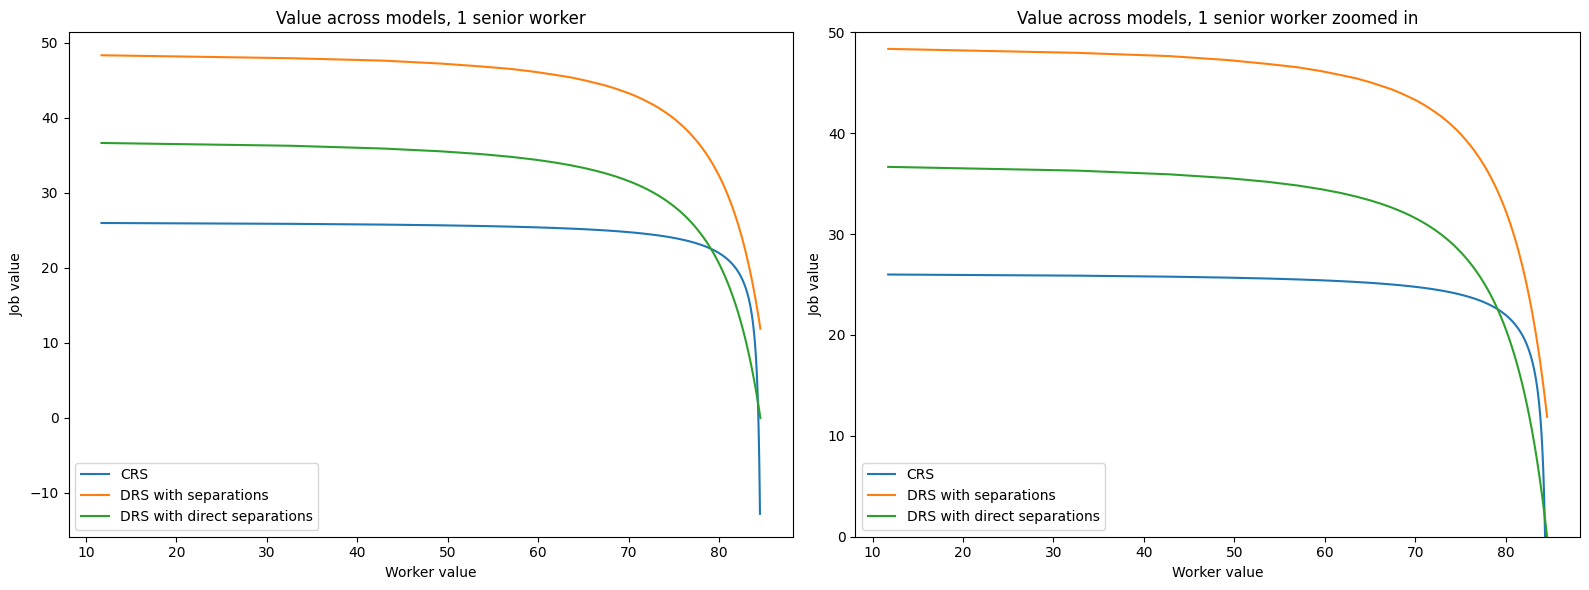

In [7]:
plts.CRSvsDRSvalue(cc_W,cc_J,mwc_hmq_W[...,5,:],mwc_hmq_J[...,5]/mwc_hmq.N_grid1[1],mwch_W,mwch_J/mwch.N_grid1[1],mwc_W,mwc_J,0)

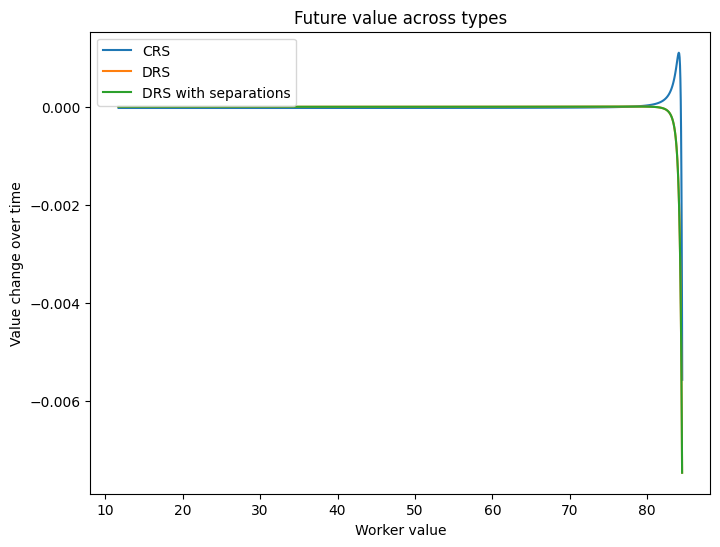

In [19]:
plts.CRSvsDRSpolicy(cc_W,cc_Wstar,mwc_hmq_W[...,0,:],mwc_hmq_Wstar[...,0],mwc_hmq_sd_W[...,0,:],mwc_hmq_sd_Wstar[...,0],mwc_sd_W,mwc_sd_Wstar,0)

In [ ]:
np.where(mwch_sd_sep==1)

In [18]:
mwc_hmq.rho_grid

array([0.01118034, 0.02695456, 0.04676295, 0.06990547, 0.09595649,
       0.1246214 , 0.15568047, 0.18896162, 0.22432531, 0.26165542,
       0.30085335, 0.34183399, 0.38452292, 0.42885433, 0.47476947,
       0.52221549, 0.5711445 , 0.62151284, 0.6732805 , 0.72641063,
       0.78086914, 0.83662439, 0.89364689, 0.95190908, 1.01138513,
       1.07205074, 1.13388304, 1.19686041, 1.26096239, 1.32616959,
       1.39246359, 1.45982686, 1.52824268, 1.5976951 , 1.66816888,
       1.73964941, 1.81212273, 1.8855754 , 1.95999455, 2.03536778,
       2.11168315, 2.18892919, 2.26709481, 2.34616932, 2.42614238,
       2.50700401, 2.58874456, 2.67135467, 2.75482529, 2.83914762,
       2.92431317, 3.01031365, 3.09714104, 3.18478753, 3.27324555,
       3.36250772, 3.45256685, 3.54341595, 3.63504822, 3.72745701,
       3.82063586, 3.91457845, 4.00927863, 4.10473037, 4.20092781,
       4.29786522, 4.39553698, 4.49393762, 4.59306178, 4.69290421,
       4.79345978, 4.89472347, 4.99669037, 5.09935565, 5.20271

In [17]:
mwc_hmq.pref.inv_utility(mwc_hmq.v_0*(1-p.beta))

0.049999999999999996

In [31]:
mwc_hmq.fun_prod[0,0,0,0,0]*mwc_hmq.prod[0,0,1,0,5]

4.0

In [33]:
mwc_hmq_Wstar[0,1,0,0,0]

11.731270855220979

In [37]:
mwc_hmq_sd_W[0,1,0,0,0,1]-mwc_hmq_W[0,1,0,0,0,1]

-4.626383685035762e-07

In [35]:
mwc_hmq_sd_Wstar[0,1,0,0,0]-mwc_hmq_Wstar[0,1,0,0,0]

-5.192890437655251e-07

In [9]:
mwc_hmq_J[0,0,1,:,5]-mwc_hmq_J[0,0,1,:,0]

array([14.09544723, 14.09544726, 14.09544728, 14.09544731, 14.09544734,
       14.09544738, 14.09544741, 14.09544744, 14.09544747, 14.0954475 ,
       14.09544753, 14.09544755, 14.09544758, 14.0954476 , 14.09544763,
       14.09544765, 14.09544767, 14.0954477 , 14.09544772, 14.09544774,
       14.09544776, 14.09544778, 14.0954478 , 14.09544782, 14.09544783,
       14.09544785, 14.09544787, 14.09544789, 14.0954479 , 14.09544792,
       14.09544794, 14.09544795, 14.09544797, 14.09544798, 14.09544799,
       14.09544801, 14.09544802, 14.09544804, 14.09544805, 14.09544806,
       14.09544807, 14.09544809, 14.0954481 , 14.09544811, 14.09544812,
       14.09544813, 14.09544815, 14.09544815, 14.09544817, 14.09544818,
       14.09544819, 14.0954482 , 14.09544821, 14.09544822, 14.09544823,
       14.09544824, 14.09544825, 14.09544826, 14.09544826, 14.09544827,
       14.09544828, 14.09544829, 14.0954483 , 14.09544831, 14.09544832,
       14.09544833, 14.09544834, 14.09544835, 14.09544835, 14.09

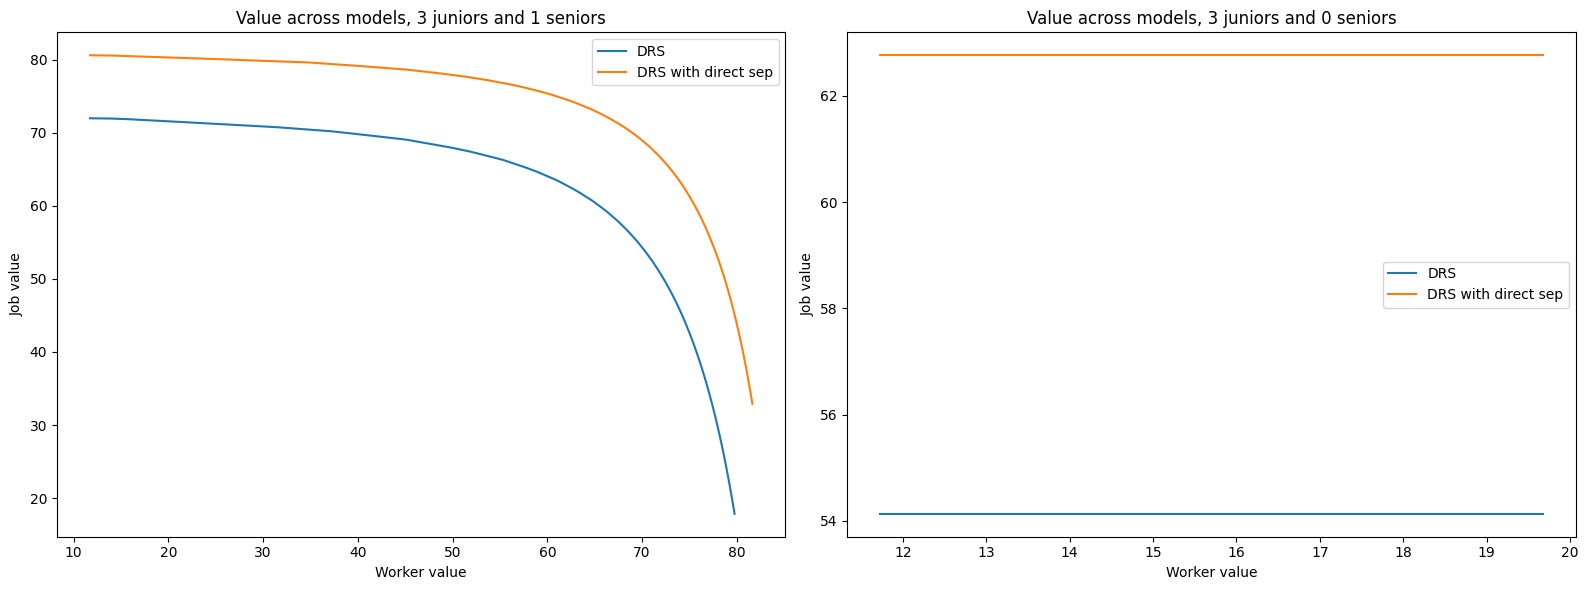

In [18]:
plts.ValueComparison(3,1,3,0,cc_W,cc_J,mwc_hmq_W[...,0,:],mwc_hmq_J[...,0],None,None,mwc_hmq_sd_W[...,0,:],mwc_hmq_sd_J[...,0],0)

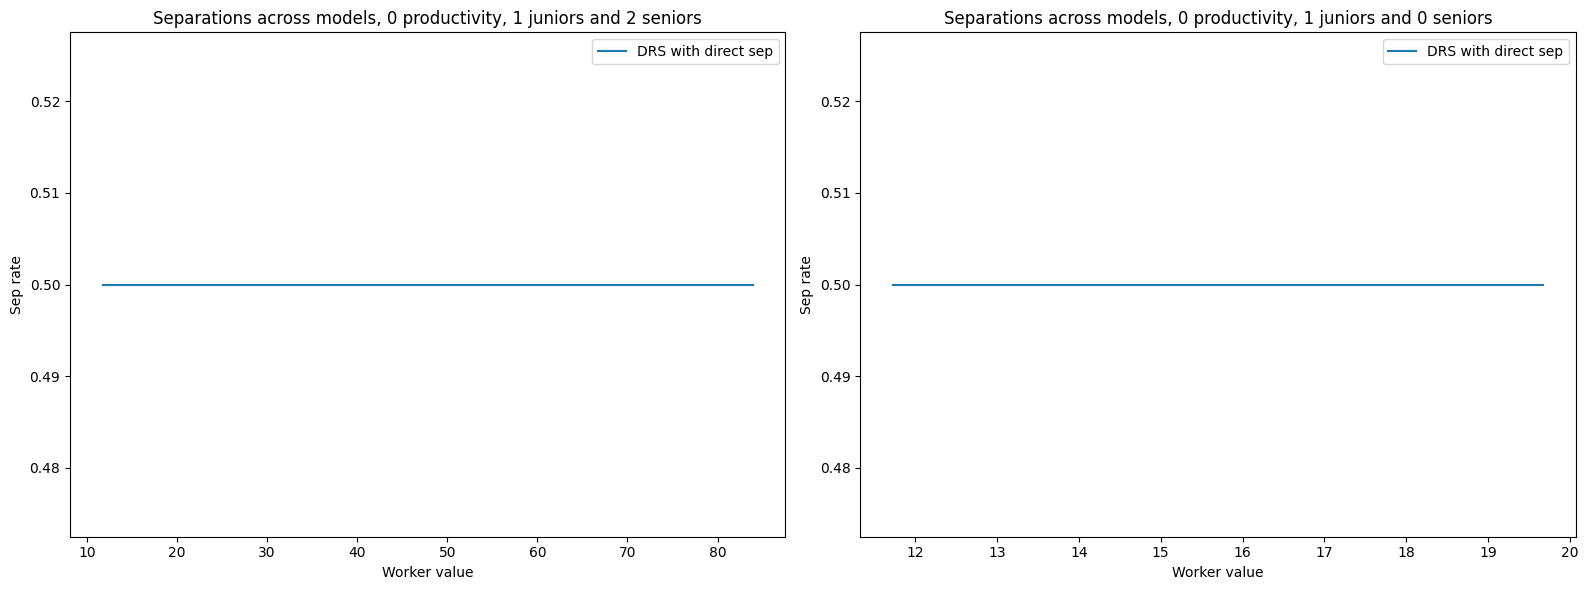

In [13]:
plts.sep(0,p.z_0-1,1,2,1,0,None,None,mwc_hmq_sd_W[...,5,:],mwc_hmq_sd_sep[...,5])

In [16]:
mwc_hmq_J[...,5]-mwc_hmq_J[...,4]

array([[[[0.17801715, 0.17801715, 0.17801715, ..., 0.17801715,
          0.17801715, 0.17801715],
         [2.78491079, 2.78491079, 2.78491079, ..., 2.78491103,
          2.78491103, 2.78491112],
         [4.87262207, 4.87262207, 4.87262208, ..., 4.87262289,
          4.87262289, 4.87262348],
         [6.70849317, 6.70849316, 6.70849317, ..., 6.70849483,
          6.70849484, 6.70849702],
         [8.38544435, 8.38544433, 8.38544434, ..., 8.38544658,
          8.38544661, 8.38545282]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [2.61642168, 2.61642168, 2.61642168, ..., 2.61642199,
          2.61642199, 2.616422  ],
         [4.71508849, 4.71508849, 4.7150885 , ..., 4.71508935,
          4.71508936, 4.71508937],
         [6.52316336, 6.52316337, 6.52316337, ..., 6.52316455,
          6.52316456, 6.52316458],
         [8.28984019, 8.28984019, 8.28984019, ..., 8.28984019,
          8.28984019, 8.28984019]],

        [[0.    

In [ ]:
plts.ValueComparison(0,2,1,0,cc_W,cc_J,mwch_W,mwch_J,mwch_s_W,mwch_s_J,mwch_sd_W,mwch_sd_J,0)

In [ ]:
plts.ValueComparison(0,2,1,0,cc_W,cc_J,mwc_W,mwc_J,mwch_W,mwch_J,mwc_sd_W,mwc_sd_J,0)

In [ ]:
#Only firings when n1=0? Shit

In [ ]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
jun=0
sen=0

if mwch_W is not None:        
    plt.plot(mwch_W[p.z_0-1, jun, sen, :, 1], mwch_n0[p.z_0-1, jun, sen, :], label='DRS')
if mwch_s_W is not None:        
    plt.plot(mwch_s_W[p.z_0-1, jun, sen, :, 1], mwch_s_n0[p.z_0-1, jun, sen, :], label='DRS with inv sep')
if mwch_sd_W is not None:        
    plt.plot(mwch_sd_W[p.z_0-1, jun, sen, :, 1], mwch_sd_n0[p.z_0-1, jun, sen, :], label='DRS with direct sep')

plt.title(f'Hires across models, {jun} juniors and {sen} seniors')
plt.xlabel('Worker value')
plt.ylabel('Hires')
plt.legend()
#Why does the job value rise when separations go to 1?
#Alex: when something strange is arising at the edge of the grid, it might be the extrapolation issue.
#Is there a way to check my intuition? Seems consistent with size and productivity changes

In [ ]:
plts.CRSvsDRSdirect(cc_J,mwc_J,0)

In [ ]:
plts.CRSvsDRSsurplus(cc_J,cc_W,mwc_J,mwc_W,0)

In [ ]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
np.abs(mwc_s_sep[:,:1,:3,:]-mwc_sd_sep[:,:1,:3,:]).max()

In [ ]:
np.max(np.abs(mwc_s_sep[:,3,0,:]-mwc_sd_sep[:,3,0,:]))

In [ ]:
np.max(mwc_sd_sep[:,1,1,:])

In [ ]:
mwc_sd_sep[:,1,1,:]

In [ ]:
mwc_s_J[:,1,0,:]/mwc_s_J[:,3,0,:] #this is odd, should be 1/3 exactly, no? it is 1/3 in the case without separations, so why not here? there aren't even any separations!

In [ ]:
np.max(mwc_s_sep[:,3,0,:])

In [ ]:
mwc_s_sep[0,1,1,:] #if the two value functions intersect, then how come the separation rate is 1?
#also thats way too many separations